# Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# for Box-Cox Transformation
from scipy import stats

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## 1.1 Merge other categories with merge
    - I wanted to compare the amount of succesful kickstarter projects with the rest of the failed,cancelled and suspended projects. Therefore live is dropped out of the dataset. (Live contains only 3% of the whole dataset).

In [4]:
def convert_state(data):
    data.state.value_counts()
    data = data[data.state!='live']
    data['state']=data['state'].replace({'canceled':'failed'})
    data['state']=data['state'].replace({'undefined':'failed'})
    data['state']=data['state'].replace({'suspended':'failed'})
    return data
data = convert_state(data)

C:\Users\muralish\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\muralish\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\muralish\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

## 1.2 Drop all the unnecessary columns

In [5]:
data = data.drop('name',axis=1)
data = data.drop('ID',axis=1)
data = data.drop('currency',axis=1)
data = data.drop('category',axis=1)

## 1.3 Find the gap between the launched and the deadline date

In [6]:
import calendar
import datetime
data['deadline_year'] = data['deadline'].str[0:4]
data['deadline_month']= data['deadline'].str[5:7]
data['launched_year'] = data['launched'].str[0:4]
data['launched_month'] = data['launched'].str[5:7]
data['deadline_year'] = data['deadline_year'].astype(int)
data['deadline_month'] = data['deadline_month'].astype(int)
data['launched_year'] = data['launched_year'].astype(int)
data['launched_month'] = data['launched_month'].astype(int)

data['duration'] = (data['deadline_year']-data['launched_year'])*12 + (data['deadline_month']-data['launched_month'])
data = data.drop('deadline_year',axis=1)
data = data.drop('deadline_month',axis=1)
data = data.drop('launched_year',axis=1)
data = data.drop('launched_month',axis=1)
data = data.drop('launched',axis=1)
data = data.drop('deadline',axis=1)

In [7]:
data.head()

,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,2
1,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,2
2,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,1
3,Music,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,1
4,Film & Video,19500.0,1283.0,failed,14,US,1283.0,1283.0,19500.00,1


## 1.4 Confirming the need to scale and normalize the data

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Scaled data')

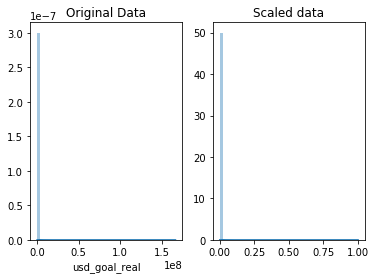

In [8]:
#Sacling
scaled_data = minmax_scaling(data.usd_goal_real, columns = [0])
fig, ax=plt.subplots(1,2)
sns.distplot(data.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Normalized data')

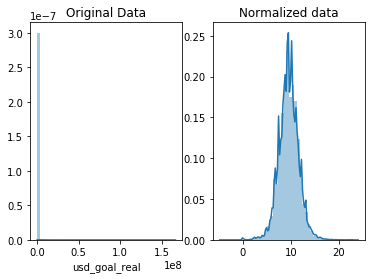

In [9]:
#Normalizing
positive_pledges = data.usd_goal_real.loc[data.usd_goal_real > 0]
normalized_pledges = stats.boxcox(positive_pledges)[0]
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

## 1.5 Drop duplicate or lagging data

In [10]:
data = data.drop('goal',axis=1)
data = data.drop('pledged',axis=1)
data = data.drop('usd pledged',axis=1)

## 1.6 USD Pledged - Cleaning

### 1.6.1 Look for the IQR and estimate the outliers range

In [49]:
data['usd_pledged_real'].describe()

count    3.758620e+05
mean     9.082678e+03
std      9.127075e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.274500e+02
75%      4.064463e+03
max      2.033899e+07
Name: usd_pledged_real, dtype: float64

In [50]:
outliers = (4065+1.5*(4065-31)) 
outliers

10116.0

count    325836.000000
mean       1486.830567
std        2254.006856
min           0.000000
25%          19.895000
50%         333.000000
75%        2065.000000
max       10115.990000
Name: usd_pledged_real, dtype: float64

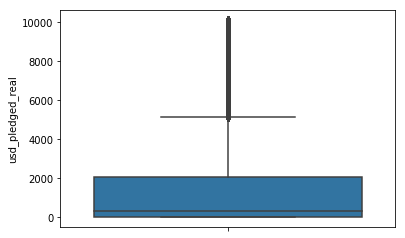

In [66]:
condition = data[data.usd_pledged_real<10116].usd_pledged_real
ax = sns.boxplot(y=condition.astype(int))
condition.describe()

In [67]:
print('outliers % is : ' + str(sum(data.usd_pledged_real>10116)/data.shape[0]*100))

outliers % is : 13.307543726154814


### 1.6.2 Understanding the normalized data

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


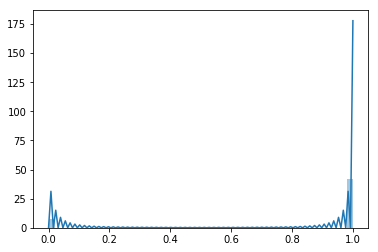

In [109]:
from sklearn.preprocessing import normalize
sns.distplot(normalize(condition.values.reshape(-1,1)))

In [134]:
print(sum(data.usd_pledged_real<5000)/data.shape[0]*100)
print(sum(data.usd_pledged_real>5000)/data.shape[0]*100)

77.51914266406288
22.422059160010853


In [220]:
condition = data[data.usd_pledged_real<1000]
#first condition 
#sum(condition.state=='failed')/len(condition)
#second condition
#condition = data[(data.usd_pledged_real < 10000) & (data.usd_pledged_real >= 5000)]
sum(condition.state=='failed')/len(condition)

0.6436032373583922

- less than 1000 - 92% failure
- less than 5000 & greater than 1000 - 42.67% failure
- greater than 20000 - 10% failure

### 1.6.3 Using the data I created a new categorical column with pledged values less than 5000 as 0 and more than 5000 as 1 and then I scaled the data

In [158]:
data['pledged>5000'] = data['usd_pledged_real'].apply(lambda x: 0 if x<5000 else 1)

In [217]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['usd_pledged_real'] = sc.fit_transform(data.usd_pledged_real.values.reshape(-1,1))
data.head()

,main_category,state,backers,country,usd_pledged_real,usd_goal_real,duration,pledged>5000
0,Publishing,failed,0,GB,-0.099514,1533.95,2,0
1,Film & Video,failed,15,US,-0.072988,30000.00,2,0
2,Film & Video,failed,3,US,-0.097103,45000.00,1,0
3,Music,failed,1,US,-0.099503,5000.00,1,0
4,Film & Video,failed,14,US,-0.085457,19500.00,1,0


## 1.7 Cleaning USD_goal_real 

In [222]:
data['usd_goal_real'].describe()

count    3.758620e+05
mean     4.532720e+04
std      1.145865e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.480000e+03
75%      1.550000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

In [233]:
outliers = 15500 + 1.5*(15500-2000)
outliers

35750.0

count    330734.000000
mean       7655.850686
std        8100.185224
min           0.010000
25%        1712.860000
50%        5000.000000
75%       10000.000000
max       35747.910000
Name: usd_goal_real, dtype: float64

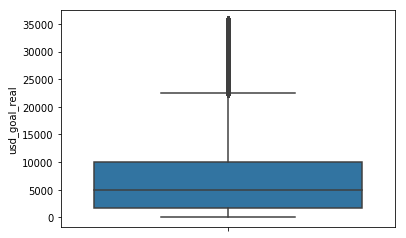

In [235]:
condition = data[data.usd_goal_real<outliers].usd_goal_real
ax = sns.boxplot(y=condition.astype(int))
condition.describe()

In [237]:
print('outliers % is : ' + str(sum(data.usd_goal_real>outliers)/data.shape[0]*100))

outliers % is : 12.006268258030873


C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


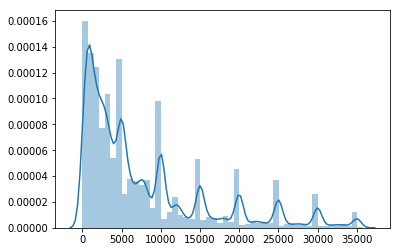

In [239]:
from sklearn.preprocessing import normalize
sns.distplot((condition.values.reshape(-1,1)))

In [242]:
print(sum(data.usd_goal_real<outliers/2)/data.shape[0]*100)
print(sum(data.usd_goal_real>outliers/2)/data.shape[0]*100)

76.39239933805493
23.607600661945074


C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


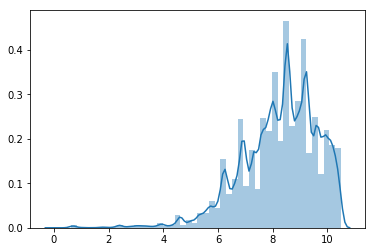

In [243]:
from sklearn.preprocessing import normalize
sns.distplot(np.log1p(condition.values.reshape(-1,1)))

In [244]:
data['USD_Log']= np.log1p(data.usd_goal_real)

In [252]:
condition = data[data.usd_goal_real>outliers]
#first condition 
#sum(condition.state=='failed')/len(condition)
#second condition
#condition = data[(data.usd_pledged_real < 10000) & (data.usd_pledged_real >= 5000)]
sum(condition.state=='failed')/len(condition)

0.8652691293460678

#### - USD_goal was normalized using a log function

# The End